In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer

In [3]:
import os
os.getcwd()

'C:\\Users\\Anam Fatima'

In [22]:
dataset = pd.read_csv("IMDB Dataset.csv")
dataset.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [23]:
dataset.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [25]:
dataset['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

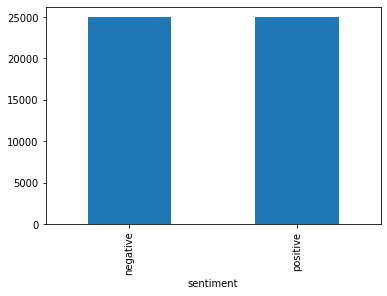

In [26]:
#dataset.groupby('sentiment')['sentiment'].agg('count').plot(kind='bar')
dataset.groupby('sentiment').size().plot(kind= 'bar')

In [27]:
dataset.groupby('sentiment').describe().T

sentiment                                               negative  \
review count                                               25000   
       unique                                              24698   
       top     This show comes up with interesting locations ...   
       freq                                                    3   

sentiment                                               positive  
review count                                               25000  
       unique                                              24884  
       top     Loved today's show!!! It was a variety and not...  
       freq                                                    5

In [28]:
pos_sent= dataset[dataset['sentiment']== 'positive']
neg_sent= dataset[dataset['sentiment']== 'negative']

#neg= dataset.loc[dataset.sentiment == 'negative']

In [29]:
pos_sent.head(5)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive


In [30]:
neg_sent

,review,sentiment
3,Basically there's a family where a little boy ...,negative
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
10,Phil the Alien is one of those quirky films wh...,negative
11,I saw this movie when I was about 12 when it c...,negative
...,...,...
49994,This is your typical junk comedy.<br /><br />T...,negative
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.

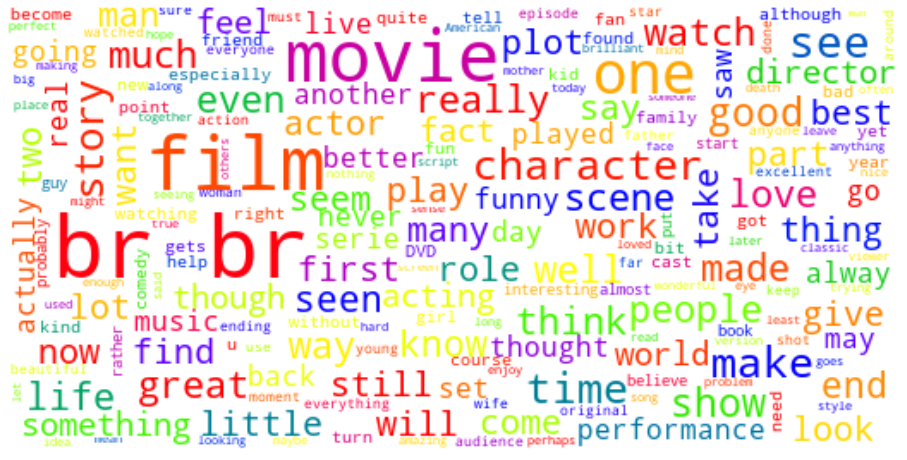

In [31]:
pos_words= ' '.join(pos_sent['review'])

pos_cloud= WordCloud(width =520, height =260, stopwords= STOPWORDS, max_font_size= 50, background_color = 'white', colormap= 'prism').generate(pos_words)
plt.figure(figsize=(16,10))
plt.imshow(pos_cloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

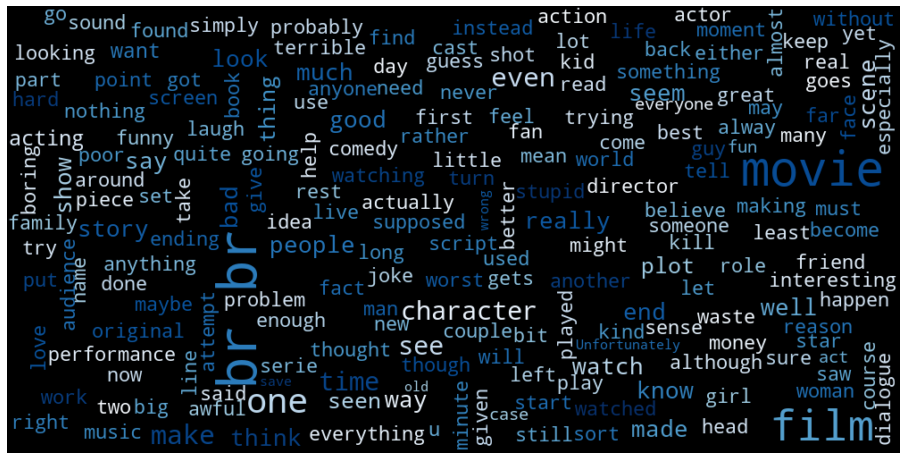

In [32]:
neg_words= ' '.join(neg_sent['review']) #it will join all the neg reviews

neg_cloud= WordCloud(width= 1000, height= 500, stopwords= STOPWORDS,max_font_size= 60, background_color= 'black', colormap= 'Blues').generate(neg_words)
plt.figure(figsize=(16,10))
plt.imshow(neg_cloud,interpolation= 'bilinear')
plt.axis('off')
plt.show()


In [19]:
#neg_sent.iloc[0,0]

In [33]:
dataset['sentiment']=dataset['sentiment'].replace(to_replace='positive',value=1)
dataset['sentiment']=dataset['sentiment'].replace(to_replace='negative',value=0)

dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [34]:
import re

In [57]:
ls= WordNetLemmatizer()
corpus=[]

for i in range(0,len(dataset)):
    
    reviews= re.sub('[^a-zA-Z]',' ', dataset['review'][i])  #replace all non letters with spaces
    #reviews= reviews.replace('<br />', ' ')
    reviews= reviews.lower()
    reviews= reviews.split()
    reviews= [ls.lemmatize(word) for word in reviews if word not in stopwords.words('english')]
    reviews= ' '.join(reviews)
    corpus.append(reviews)
    
   

In [37]:
# creating bag of words
cv= CountVectorizer(max_features= 2000)
x= cv.fit_transform(corpus).toarray()

In [38]:
y= dataset.iloc[:,[1]].values

In [39]:
y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [41]:
#splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size= 1/4, random_state=0)

In [42]:
# Training model using logistic regression
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\Anam Fatima\Documents\New folder\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Anam Fatima\Documents\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [43]:
y_pred= lr.predict(x_test)

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm_lr= confusion_matrix(y_test,y_pred)
cm_lr

array([[5446,  845],
       [ 740, 5469]], dtype=int64)

In [45]:
acc_lr= accuracy_score(y_test,y_pred)
acc_lr

0.8732

In [46]:
#training model using MultinomialNB
from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB()
nb.fit(x_train,y_train)

C:\Users\Anam Fatima\Documents\New folder\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MultinomialNB()

In [47]:
y_pred= nb.predict(x_test)

In [48]:
cm_nb= confusion_matrix(y_test,y_pred)
cm_nb

array([[5248, 1043],
       [ 997, 5212]], dtype=int64)

In [49]:
acc_nb= accuracy_score(y_test,y_pred)
acc_nb

0.8368

In [51]:
#training model using random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=400, random_state= 0)
rfc.fit(x_train,y_train)


C:\Users\Anam Fatima\Documents\New folder\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(n_estimators=400, random_state=0)

In [52]:
y_pred= rfc.predict(x_test)

In [53]:
cm_rf= confusion_matrix(y_test,y_pred)
cm_rf

array([[5312,  979],
       [ 952, 5257]], dtype=int64)

In [54]:
acc_rf= accuracy_score(y_test,y_pred)
acc_rf

0.84552

In [58]:
from tensorflow.keras import layers, models, backend as K, optimizers

ModuleNotFoundError: No module named 'tensorflow'